In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [56]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [58]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [59]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [60]:
# split into train and test dataset
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [61]:
X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [62]:
age_mean = X_train["Age"].mean()
age_median = X_train["Age"].median()

fare_mean = X_train["Fare"].mean()
fare_median = X_train["Fare"].median()

In [63]:
X_train["age_mean"] = X_train["Age"].fillna(age_mean)
X_train["age_median"] = X_train["Age"].fillna(age_median)

X_train["fare_mean"] = X_train["Fare"].fillna(fare_mean)
X_train["fare_median"] = X_train["Fare"].fillna(fare_median)

In [64]:
X_train.sample(10)

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
824,2.0,39.6875,5,2.000000,2.00,39.6875,39.6875
182,9.0,31.3875,6,9.000000,9.00,31.3875,31.3875
514,24.0,7.4958,0,24.000000,24.00,7.4958,7.4958
363,35.0,7.0500,0,35.000000,35.00,7.0500,7.0500
818,43.0,6.4500,0,43.000000,43.00,6.4500,6.4500
393,23.0,113.2750,1,23.000000,23.00,113.2750,113.2750
586,47.0,15.0000,0,47.000000,47.00,15.0000,15.0000
277,NaN,0.0000,0,29.785904,28.75,0.0000,0.0000
791,16.0,26.0000,0,16.000000,16.00,26.0000,26.0000
868,NaN,9.5000,0,29.785904,28.75,9.5000,9.5000


In [65]:
# lets check the variance of original Age column
X_train["Age"].var()

np.float64(204.34951339046142)

In [66]:
# after imputing the nan values with mean and median, we can see that the variance has decreased.
X_train["age_mean"].var(), X_train["age_median"].var()

# so why does the variance decrease actually?
# the thing is, when you replace null values with mean, you have more frequency of numbers around mean.
# and variance is what? spread of data around mean. so more numbers around mean -> variance decreases.

(np.float64(161.81262452718676), np.float64(161.98956633460548))

<Axes: ylabel='Density'>

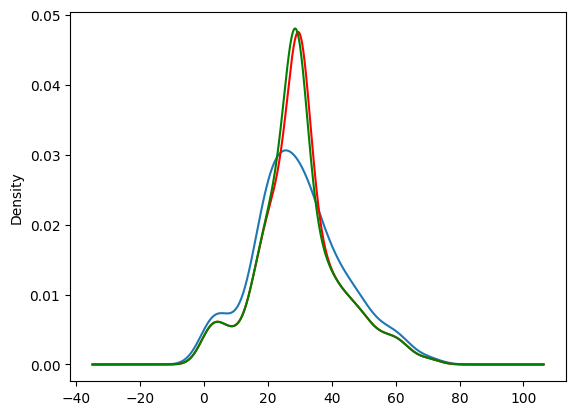

In [67]:
# visualizing age distribution before and after imputation

fig = plt.figure()
ax = plt.subplot(111)

# distribution of "age" without imputation
X_train["Age"].plot(kind="kde")

# distribution of "age" after mean imputation
X_train["age_mean"].plot(kind="kde", ax=ax, color="r")


# distribution of "age" after median imputation
X_train["age_median"].plot(kind="kde", ax=ax, color="g")

# we can see that the age after mean and median imputation have lower spread(variance) than original age column


<Axes: ylabel='Density'>

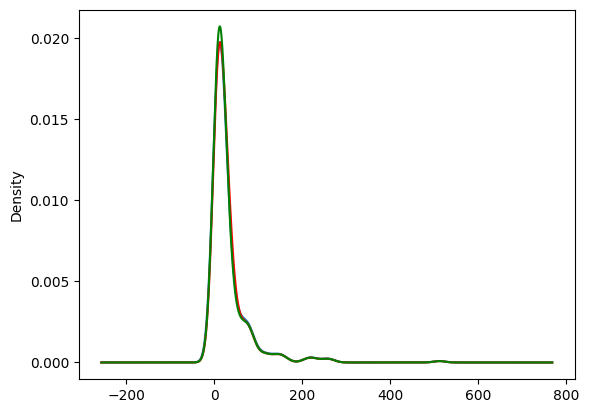

In [68]:
# visualizing age distribution before and after imputation

fig = plt.figure()
ax = plt.subplot(111)

# distribution of "age" without imputation
X_train["Fare"].plot(kind="kde")

# distribution of "age" after mean imputation
X_train["fare_mean"].plot(kind="kde", ax=ax, color="r")


# distribution of "age" after median imputation
X_train["fare_median"].plot(kind="kde", ax=ax, color="g")

# we can see that the age after mean and median imputation have lower spread(variance) than original age column


## Using sklearn

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [70]:
imputer1 = SimpleImputer(strategy="mean")
imputer2 = SimpleImputer(strategy= "median")

In [71]:
trsf = ColumnTransformer(
    [
        ("age_mean", imputer1, ["Age"]),
        ("fare_median", imputer2, ["Fare"])
    ],
    remainder="passthrough"
)

In [73]:
X_train = trsf.fit_transform(X_train)
X_test = trsf.transform(X_test)

In [74]:
trsf

/usr/local/Cellar/jupyterlab/4.3.5/libexec/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('age_mean', SimpleImputer(), ['Age']),
                                ('fare_median',
                                 SimpleImputer(strategy='median'), ['Fare'])])

In [76]:
trsf.named_transformers_

{'age_mean': SimpleImputer(),
 'fare_median': SimpleImputer(strategy='median'),
 'remainder': FunctionTransformer(accept_sparse=True, check_inverse=False,
                     feature_names_out='one-to-one')}

In [80]:
trsf.named_transformers_["age_mean"].statistics_

array([29.78590426])

In [81]:
trsf.named_transformers_["fare_median"].statistics_

array([14.4583])